In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


# data set.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [2]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(['Date', "Holiday", "Seasons"], axis=1)

In [3]:
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


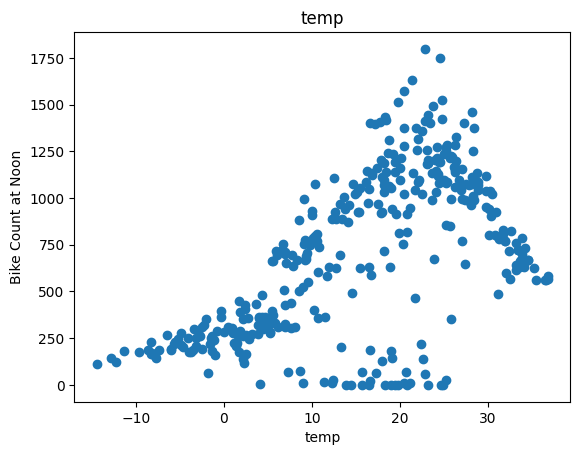

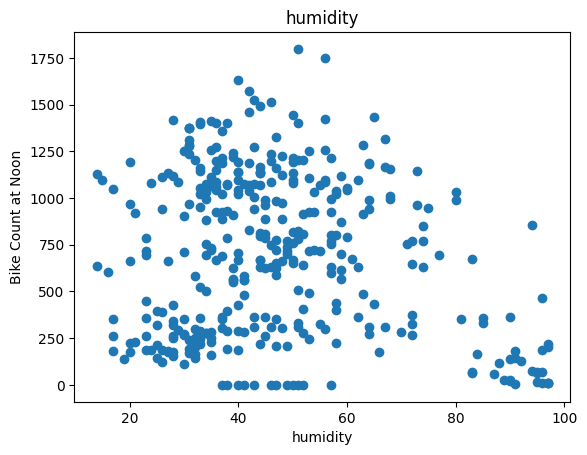

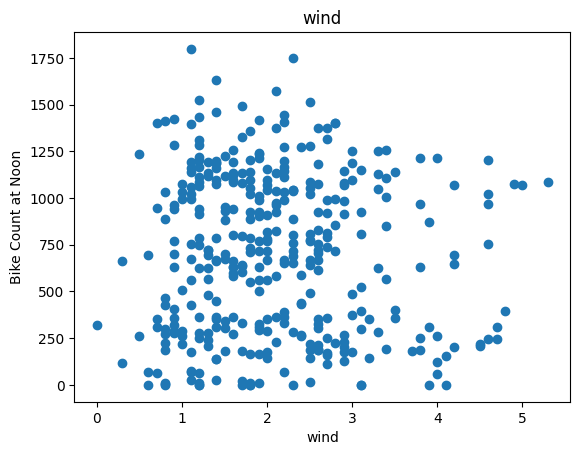

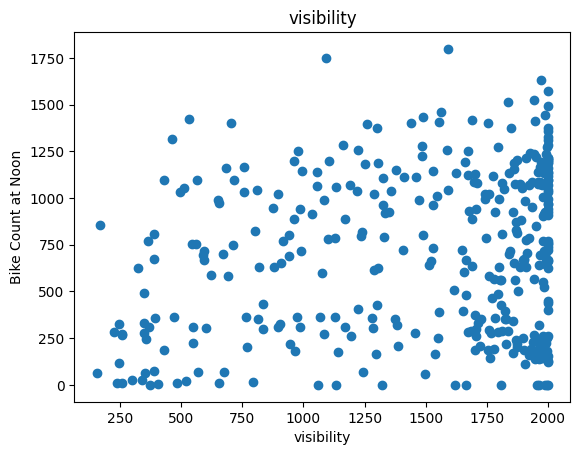

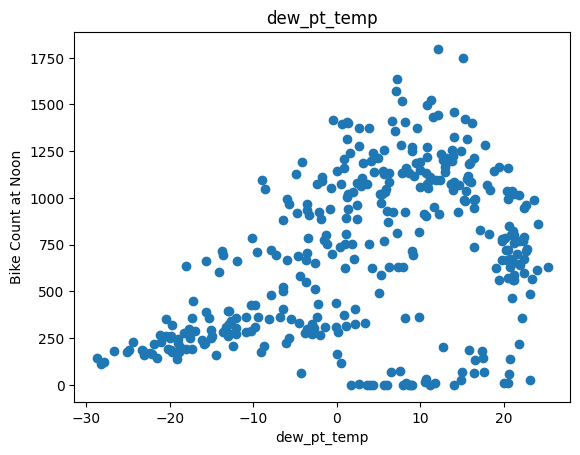

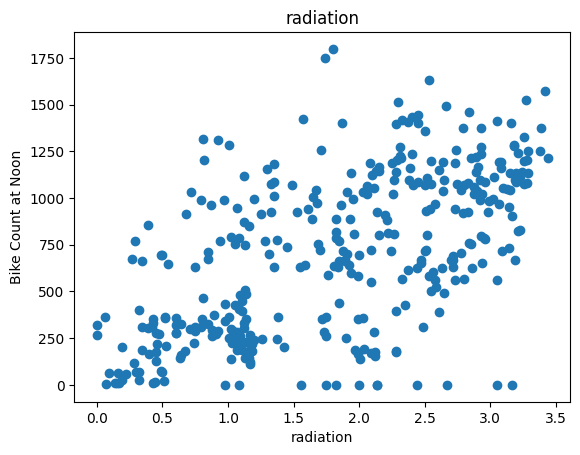

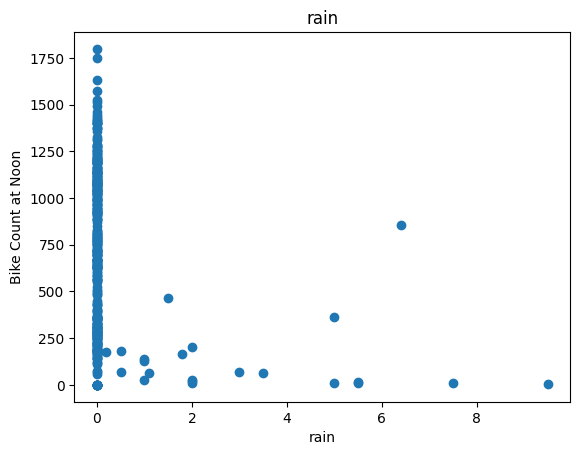

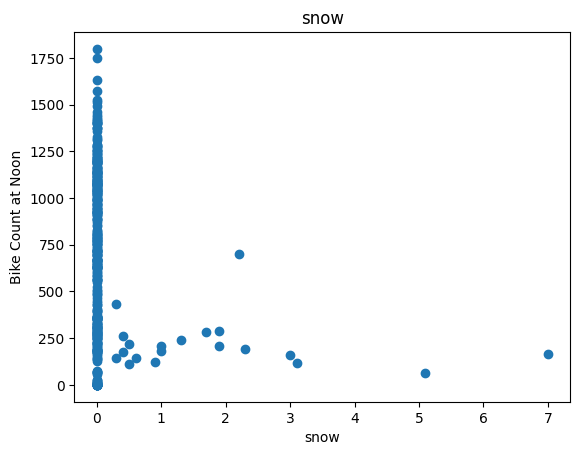

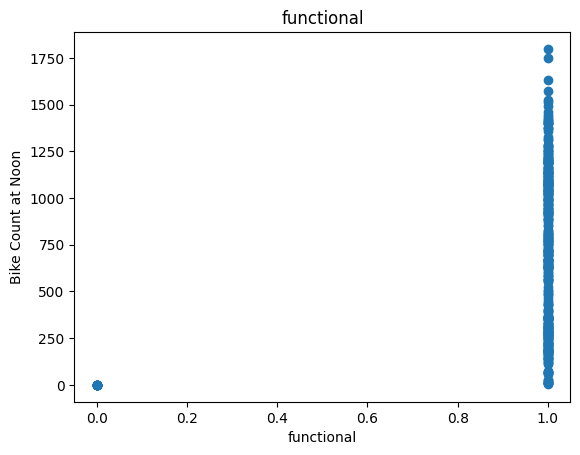

In [6]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [7]:
df = df.drop(["wind", 'visibility', 'functional'], axis=1)

In [8]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train / valid / test dataset

In [9]:
train, val , test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

d:\ML\MLApprentice-100DaysWithCPC\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [23]:
def get_xy(dataframe, y_label, x_label = None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        x = dataframe[[c for c in dataframe.columns if c!=y_label]].values()
    else:
        if len(x_label)==1:
            x = dataframe[x_label[0]].values.reshape(-1,1)
        else:
            x = dataframe[x_label].values

    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((x,y))

    return data, x, y

In [26]:
_, x_train_temp, y_train_temp = get_xy(train, 'bike_count', x_label=["temp"])
_, x_val_temp, y_val_temp = get_xy(val, 'bike_count', x_label=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, 'bike_count', x_label=["temp"])

In [18]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
temp_reg.score(x_test_temp, y_test_temp)

0.22344454926903667

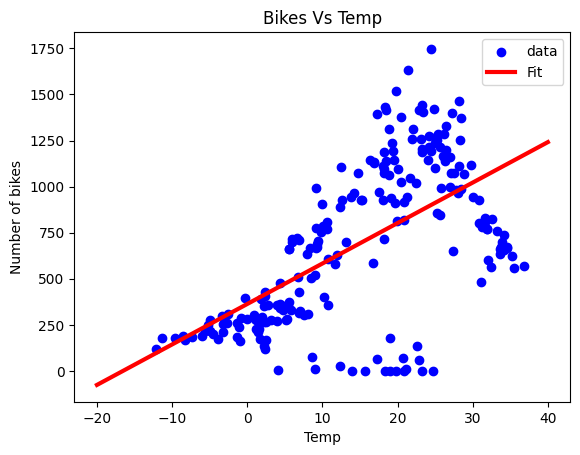

In [20]:
plt.scatter(x_train_temp, y_train_temp, label="data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red",linewidth=3)
plt.legend()
plt.title("Bikes Vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# multiple Liner Regression

In [25]:
train, val , test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, 'bike_count', x_label=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, 'bike_count', x_label=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, 'bike_count', x_label=df.columns[1:])

d:\ML\MLApprentice-100DaysWithCPC\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [30]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
all_reg.score(x_test_all, y_test_all)

0.5421349886711191

# regression with neural net

In [34]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

d:\ML\MLApprentice-100DaysWithCPC\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
temp_nn_model = tf.keras.Sequential(
    [
        temp_normalizer,
        tf.keras.layers.Dense(1)
    ]
)

In [37]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [39]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1),
    y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(x_val_temp,y_val_temp)
)

In [40]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

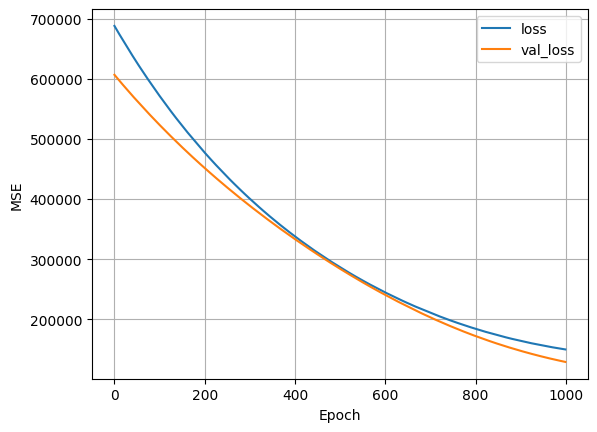

In [41]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


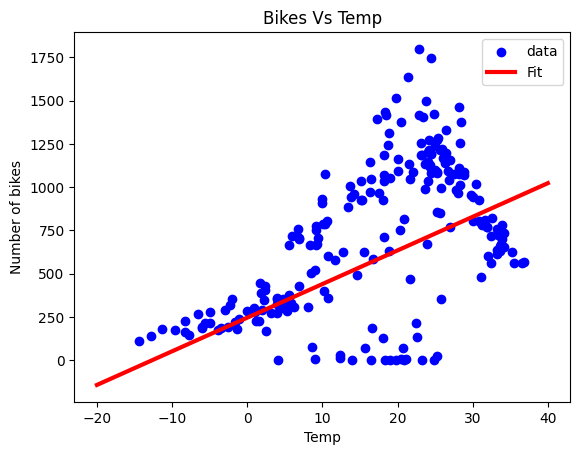

In [42]:
plt.scatter(x_train_temp, y_train_temp, label="data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red",linewidth=3)
plt.legend()
plt.title("Bikes Vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Nural Net

In [48]:
nn_model = tf.keras.Sequential(
    [
        temp_normalizer,
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)
    ]
)
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [49]:
history= nn_model.fit(
    x_train_temp,
    y_train_temp,
    validation_data = (x_val_temp, y_val_temp),
    verbose=0,
    epochs=100
)

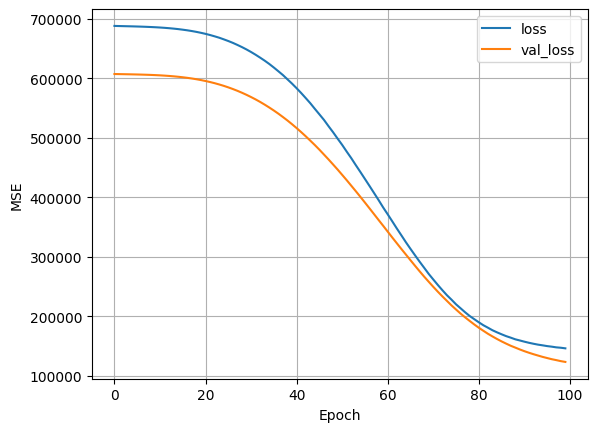

In [50]:
plot_loss(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000265AB9CE8E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


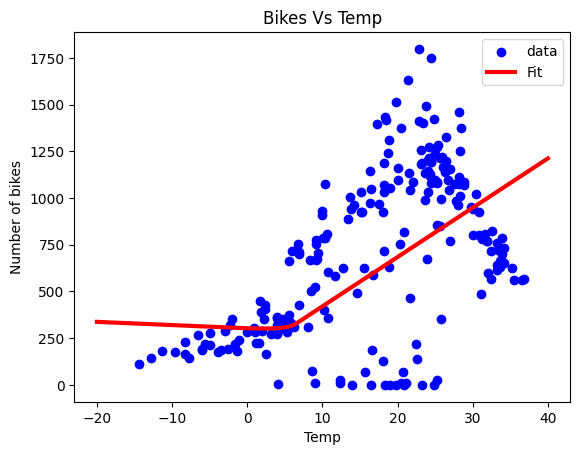

In [51]:
plt.scatter(x_train_temp, y_train_temp, label="data", color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red",linewidth=3)
plt.legend()
plt.title("Bikes Vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()